# How does a Megacrop company speedy success?

## Introduction
This case study serves as the capstone of the [Google Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-data-analytics).

## Scenario
I am a junior data analyst working in the marketing analyst team at MEGACORP ,a toy manufacturing company United States. The director of marketing believes the company’s future success depends on the overall profitability of the company, the production units, and products. Therefore, our team wants to understand present a report focusing on profitability for MEGACORP. The report is necessary to help the Board understand the state of the company before it makes any decisions. From these insights, our team will design a new marketing strategy to increase the overall profitability of the company, the production units, and products. But first, MEGACORP executives must approve our recommendations, so they must be backed up with compelling data insights and professional data visualizations.

### About MEGACORP2020
Between 05JAN2008 and 04JAN2020, MEGACORP2020 has daily data for each item produced by a unit. 

If a unit did not produce a product on a day, one row is written to the table with a non-active unit status (closed, failure, upgrade, or upkeep). Because no products were produced on these units,product ID values are missing.

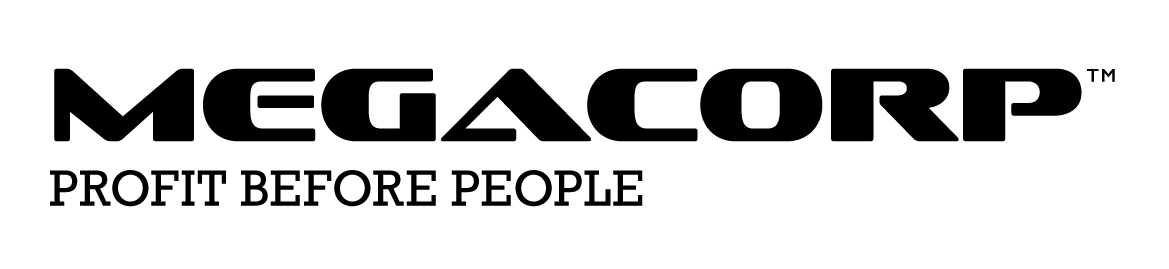



In this analysis I will follow the 6 phases of Data analysis process which are: **Ask, Prepare, Process, Analysis, Share, Act**

# 1. Ask

The Marketing department led by **Moreno** has a clear goal which is maximising the overall profitability of the company, the 
active production units, and products, so as a data analysis I have to find how annaual and casual profitability use **active production units**for specific product.
As a data analyst I should provide the skateholders and the marketing department with the data-driven insights that help them to understand what might make a casual profitability to be expected to be an annaual profitabilityalong side with visuals and relevant information to support these insights.
 
In particular, I am interested in the following:
* Examine the structure of the MEGACORP2020 table.
* Investigate the range of dates in the MEGACORP2020 table.

* Examine the counts and totals for Unit Status and each day of the week.
* Examine the relationship between Facility Age, Unit Age, Unit Capacity, Unit Downtime, and Unit Yield (actual).

* Examine MEGACORP’s profitability over the last five years (Date >= 1JAN2015).
* Examine profit, capacity, and yield rate by year at the state, facility, and unit level.

* Examine profits by Product Brand and Product Line
* Examine future profits for each product line based on the past five years?
* Provide an assessment of MEGACORP


# 2. Prepare 

#### Dataset
I will use Megacrop’s historical trip data,to analyze and identify trends Between 05JAN2008 and 04JAN2020.This data is not available over the internet or in Kaggle dataset,I install it from SAS® Data Explorer - Manage Data on SAS Viya then upload it to kaggle.The dataset captures the details of every unit status logged by the customers of Active unit status.
here. (Note: The datasets havee a real-world business problem. For the purposes of this case study,
the datasets are appropriate and will enable you to answer the business questions. The data has been made available by my Google drive.

Given that this was internal data, it is safe to assume that it is unbiased and credible.

The data included the following fields:

* **Date** : Manufacturing date (between 05JAN2008 and 04JAN2020)

* **Date by Month**: Manufacturing month (between JAN2008 and JAN2020)

* **Date by Year**: Manufacturing year (between 2008 and 2020)

* **Day of Week**: Weekday identifier: 1=Sunday, 2=Monday, …,7=Saturday

* **Expenses**: Total expenses

* **Facility**:Unique identifier for each facility

* **Facility Age**: Age of facility (in years)

* **Facility City** : City in the US where manufacturing facility is located
* **Facility Region**: Region in the US where manufacturing facility is located


* **Facility State**: State in the US where manufacturing facility is located


* **Product**: Type of product within each product line

* **Product Brand**: Brand of the product (Toy or Novelty)

* **Product Description**:Description of each product.

* **Product ID**: Unique numeric identifier for each product

* **Product Line**: Product line within each product brand (Toy has Action Figure, 
Game, and Stuffed Animal; Novelty has Promotional)

* **Profit**:Total profit (Revenue - Expenses)

* **Region Latitude** : Latitude for each manufacturing region in the US

* **Region Longitude** : Longitude for each manufacturing region in the US
* **Facility Region**: Region in the US where manufacturing facility is located


* **Revenue**: Total revenue

* **State Latitude**: Latitude for each manufacturing state in the US

* **State Longitude**: Longitude for each manufacturing state in the US

* **Unit**:Unique identifier for each production unit.

* **Unit Age**: Age of unit (in years)


* **Unit Capacity**: Maximum number of products that can be produced on a specific unit.


* **Unit Downtime**:Indicator for the unit being non-operational: 1 (true) or 0 (false)

* **Unit Reliability** : Percentage of time a unit is operational


* **Unit Status**: Operational status for a unit (active, closed, failure, upgrade, or upkeep)

* **Unit Yield (actual)**:Actual number of products produced on a specific unit

* **Unit Yield (rate)**: Percentage of actual production divided by targeted production


* **Unit Yield (target)**: Targeted number of products produced on a specific unit.


* **City Latitude**:Latitude for each manufacturing city in the US

* **City Longitude** : Longitude for each manufacturing city in the US





# 3. Clean

The combined size of the previous 12 months of data is enormous. The combined datasets are about 850 MB with 6 millions record so cleaning and analysing using spreadsheets will be time-consuming and propably the spreadsheet would crash at some point.
So I am going with **python** to clean, analyse the data and create some simple visuaizations and for further and more complex visualization I will be using **Power BI and SAS Viya**.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/megacrop/table_MEGACORP2020.csv
/kaggle/input/MegacropLogo/megacorp-logo.png


#### Loading the needed libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import Image

#### Importing datasets

In [3]:
data=pd.read_csv('/kaggle/input/megacrop/table_MEGACORP2020.csv')
data.head()

,Date,DateByYear,DateByMonth,DayOfWeek,Facility,FacilityAge,FacilityRegion,FacilityState,FacilityCity,Unit,...,ProductDescription,Profit,Revenue,Expenses,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude
0,14AUG2010,2010,AUG2010,7,WA00042,10,West,WA,Seattle,TOYGM0000044,...,Chess,$26.97,$59.40,$32.42,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
1,24FEB2010,2010,FEB2010,4,WA00042,10,West,WA,Seattle,TOYGM0000044,...,Chess,$138.52,$176.47,$37.94,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
2,21APR2010,2010,APR2010,4,WA00042,10,West,WA,Seattle,TOYGM0000044,...,250 Piece,$93.82,$119.70,$25.87,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
3,01FEB2010,2010,FEB2010,2,WA00042,10,West,WA,Seattle,TOYGM0000044,...,Life Lessons,$29.73,$61.56,$31.83,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
4,26FEB2010,2010,FEB2010,6,WA00042,10,West,WA,Seattle,TOYGM0000044,...,500 Piece,$148.11,$169.68,$21.57,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639


Going through each dataset to check the data types and consistency of the data:

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229087 entries, 0 to 2229086
Data columns (total 32 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Date                object 
 1   DateByYear          int64  
 2   DateByMonth         object 
 3   DayOfWeek           int64  
 4   Facility            object 
 5   FacilityAge         int64  
 6   FacilityRegion      object 
 7   FacilityState       object 
 8   FacilityCity        object 
 9   Unit                object 
 10  UnitDowntime        int64  
 11  UnitAge             int64  
 12  UnitReliability     object 
 13  UnitStatus          object 
 14  UnitCapacity        int64  
 15  UnitYieldTarget     int64  
 16  UnitYieldActual     int64  
 17  UnitYieldRate       object 
 18  ProductBrand        object 
 19  ProductLine         object 
 20  ProductID           object 
 21  Product             object 
 22  ProductDescription  object 
 23  Profit              object 
 24  Revenue             obje

In [5]:
data_duplicate=data[data.duplicated()]

data_duplicate

,Date,DateByYear,DateByMonth,DayOfWeek,Facility,FacilityAge,FacilityRegion,FacilityState,FacilityCity,Unit,...,ProductDescription,Profit,Revenue,Expenses,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude
5,24FEB2010,2010,FEB2010,4,WA00042,10,West,WA,Seattle,TOYGM0000044,...,Chess,$138.52,$176.47,$37.94,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
9,24FEB2010,2010,FEB2010,4,WA00042,10,West,WA,Seattle,TOYGM0000044,...,Chess,$138.52,$176.47,$37.94,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
10,23APR2010,2010,APR2010,6,WA00042,10,West,WA,Seattle,TOYGM0000044,...,250 Piece,$-4.89,$16.96,$21.86,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
11,01FEB2010,2010,FEB2010,2,WA00042,10,West,WA,Seattle,TOYGM0000044,...,Life Lessons,$29.73,$61.56,$31.83,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
13,24FEB2010,2010,FEB2010,4,WA00042,10,West,WA,Seattle,TOYGM0000044,...,Chess,$138.52,$176.47,$37.94,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229082,14OCT2019,2019,OCT2019,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,...,Golf (W),$-17.70,$4.09,$21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229083,13MAR2019,2019,MAR2019,4,LA00021,25,South,LA,New Orleans,TOYAF0000022,...,Male,$-9.53,$12.26,$21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229084,07OCT2019,2019,OCT2019,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,...,Wonder Woman,$-17.70,$4.09,$21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229085,07OCT2019,2019,OCT2019,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,...,Wonder Woman,$-17.70,$4.09,$21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444


In [7]:
pd.set_option('display.max_columns', None)
data

,Date,DateByYear,DateByMonth,DayOfWeek,Facility,FacilityAge,FacilityRegion,FacilityState,FacilityCity,Unit,UnitDowntime,UnitAge,UnitReliability,UnitStatus,UnitCapacity,UnitYieldTarget,UnitYieldActual,UnitYieldRate,ProductBrand,ProductLine,ProductID,Product,ProductDescription,Profit,Revenue,Expenses,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude
0,14AUG2010,2010,AUG2010,7,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,87%,active,44,42,37,88%,Toy,Game,1.51E6,Board,Chess,$26.97,$59.40,$32.42,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
1,24FEB2010,2010,FEB2010,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89%,active,44,42,25,60%,Toy,Game,1.44E6,Board,Chess,$138.52,$176.47,$37.94,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
2,21APR2010,2010,APR2010,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89%,active,44,42,28,67%,Toy,Game,1.47E6,Puzzle,250 Piece,$93.82,$119.70,$25.87,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
3,01FEB2010,2010,FEB2010,2,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,90%,active,44,42,39,93%,Toy,Game,1.43E6,Board,Life Lessons,$29.73,$61.56,$31.83,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
4,26FEB2010,2010,FEB2010,6,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89%,active,44,42,39,93%,Toy,Game,1.45E6,Puzzle,500 Piece,$148.11,$169.68,$21.57,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229082,14OCT2019,2019,OCT2019,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,0,1,97%,active,52,22,22,100%,Toy,Action Figure,2.95E6,Athlete,Golf (W),$-17.70,$4.09,$21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229083,13MAR2019,2019,MAR2019,4,LA00021,25,South,LA,New Orleans,TOYAF0000022,0,1,98%,active,52,22,22,100%,Toy,Action Figure,2.9E6,Movie Star,Male,$-9.53,$12.26,$21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229084,07OCT2019,2019,OCT2019,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,0,1,97%,active,52,22,22,100%,Toy,Action Figure,2.95E6,Super Hero,Wonder Woman,$-17.70,$4.09,$21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229085,07OCT2019,2019,OCT2019,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,0,1,97%,active,52,22,22,100%,Toy,Action Figure,2.95E6,Super Hero,Wonder Woman,$-17.70,$4.09,$21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444


In [8]:
data.drop_duplicates()

,Date,DateByYear,DateByMonth,DayOfWeek,Facility,FacilityAge,FacilityRegion,FacilityState,FacilityCity,Unit,UnitDowntime,UnitAge,UnitReliability,UnitStatus,UnitCapacity,UnitYieldTarget,UnitYieldActual,UnitYieldRate,ProductBrand,ProductLine,ProductID,Product,ProductDescription,Profit,Revenue,Expenses,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude
0,14AUG2010,2010,AUG2010,7,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,87%,active,44,42,37,88%,Toy,Game,1.51E6,Board,Chess,$26.97,$59.40,$32.42,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
1,24FEB2010,2010,FEB2010,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89%,active,44,42,25,60%,Toy,Game,1.44E6,Board,Chess,$138.52,$176.47,$37.94,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
2,21APR2010,2010,APR2010,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89%,active,44,42,28,67%,Toy,Game,1.47E6,Puzzle,250 Piece,$93.82,$119.70,$25.87,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
3,01FEB2010,2010,FEB2010,2,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,90%,active,44,42,39,93%,Toy,Game,1.43E6,Board,Life Lessons,$29.73,$61.56,$31.83,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
4,26FEB2010,2010,FEB2010,6,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89%,active,44,42,39,93%,Toy,Game,1.45E6,Puzzle,500 Piece,$148.11,$169.68,$21.57,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2228646,18NOV2016,2016,NOV2016,6,AL00027,21,South,AL,Birmingham,TOYAF0000028,1,5,80%,failure,48,0,0,.,Toy,Action Figure,.,.,.,$-624.86,$0.00,$624.86,-90.642710,34.255277,-86.733277,32.615651,-86.80250,33.52056
2228649,23OCT2016,2016,OCT2016,1,AL00027,21,South,AL,Birmingham,TOYAF0000028,1,5,80%,closed,48,0,0,.,Toy,Action Figure,.,.,.,$-213.70,$0.00,$213.70,-90.642710,34.255277,-86.733277,32.615651,-86.80250,33.52056
2228682,20NOV2016,2016,NOV2016,1,AL00027,21,South,AL,Birmingham,TOYAF0000029,1,5,80%,closed,48,0,0,.,Toy,Action Figure,.,.,.,$-213.70,$0.00,$213.70,-90.642710,34.255277,-86.733277,32.615651,-86.80250,33.52056
2228801,30OCT2016,2016,OCT2016,1,AL00027,21,South,AL,Birmingham,TOYAF0000029,1,5,80%,closed,48,0,0,.,Toy,Action Figure,.,.,.,$-213.70,$0.00,$213.70,-90.642710,34.255277,-86.733277,32.615651,-86.80250,33.52056


Now let's convert "Date" into Datetime type


In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data['DateByYear'] = pd.to_datetime(data['DateByYear'])
data['DateByYear'] = data['Date'].dt.strftime('%Y')
data['DateByMonth'] = data['Date'].dt.month_name().str[:3]

check for numeric column

In [10]:
import re
data['Profit'] = [re.sub('[$]', '', x) for x in data['Profit']]
data['Profit']=pd.to_numeric(data['Profit'],errors='coerce')
data['Revenue'] = [re.sub('[$]', '', x) for x in data['Revenue']]
data['Revenue']=pd.to_numeric(data['Revenue'],errors='coerce')
data['Expenses'] = [re.sub('[$]', '', x) for x in data['Expenses']]
data['Expenses']=pd.to_numeric(data['Expenses'],errors='coerce')
data['UnitYieldRate'] = [re.sub('[%]', '', x) for x in data['UnitYieldRate']]
data['UnitYieldRate']=pd.to_numeric(data['UnitYieldRate'],errors='coerce')
data['UnitReliability'] = [re.sub('[%]', '', x) for x in data['UnitReliability']]
data['UnitReliability']=pd.to_numeric(data['UnitReliability'],errors='coerce')
data=data.rename(columns={"Profit": "Profit By Dollar", "Revenue": "Revenue By Dollar", "Expenses": "Expenses By Dollar", "UnitYieldRate": "UnitYieldRate By Percentage", "UnitReliability": 'UnitReliability By Percentage'})


data.head()

,Date,DateByYear,DateByMonth,DayOfWeek,Facility,FacilityAge,FacilityRegion,FacilityState,FacilityCity,Unit,UnitDowntime,UnitAge,UnitReliability By Percentage,UnitStatus,UnitCapacity,UnitYieldTarget,UnitYieldActual,UnitYieldRate By Percentage,ProductBrand,ProductLine,ProductID,Product,ProductDescription,Profit By Dollar,Revenue By Dollar,Expenses By Dollar,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude
0,2010-08-14,2010,Aug,7,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,87,active,44,42,37,88.0,Toy,Game,1.51E6,Board,Chess,26.97,59.40,32.42,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
1,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
2,2010-04-21,2010,Apr,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,28,67.0,Toy,Game,1.47E6,Puzzle,250 Piece,93.82,119.70,25.87,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
3,2010-02-01,2010,Feb,2,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,90,active,44,42,39,93.0,Toy,Game,1.43E6,Board,Life Lessons,29.73,61.56,31.83,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
4,2010-02-26,2010,Feb,6,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,39,93.0,Toy,Game,1.45E6,Puzzle,500 Piece,148.11,169.68,21.57,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639


Chect for duplicate

In [9]:
data_duplicate=data[data.duplicated()]

data_duplicate

,Date,DateByYear,DateByMonth,DayOfWeek,Facility,FacilityAge,FacilityRegion,FacilityState,FacilityCity,Unit,...,ProductDescription,Profit By Dollar,Revenue By Dollar,Expenses By Dollar,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude
5,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,...,Chess,138.52,176.47,37.94,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
9,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,...,Chess,138.52,176.47,37.94,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
10,2010-04-23,2010,Apr,6,WA00042,10,West,WA,Seattle,TOYGM0000044,...,250 Piece,-4.89,16.96,21.86,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
11,2010-02-01,2010,Feb,2,WA00042,10,West,WA,Seattle,TOYGM0000044,...,Life Lessons,29.73,61.56,31.83,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
13,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,...,Chess,138.52,176.47,37.94,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229082,2019-10-14,2019,Oct,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,...,Golf (W),-17.70,4.09,21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229083,2019-03-13,2019,Mar,4,LA00021,25,South,LA,New Orleans,TOYAF0000022,...,Male,-9.53,12.26,21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229084,2019-10-07,2019,Oct,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,...,Wonder Woman,-17.70,4.09,21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229085,2019-10-07,2019,Oct,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,...,Wonder Woman,-17.70,4.09,21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444


In [ ]:
data.drop_duplicates(subset=None,
                     keep="first",inplace=True)

In [12]:
data_duplicate=data[data.duplicated()]

data_duplicate

,Date,DateByYear,DateByMonth,DayOfWeek,Facility,FacilityAge,FacilityRegion,FacilityState,FacilityCity,Unit,UnitDowntime,UnitAge,UnitReliability By Percentage,UnitStatus,UnitCapacity,UnitYieldTarget,UnitYieldActual,UnitYieldRate By Percentage,ProductBrand,ProductLine,ProductID,Product,ProductDescription,Profit By Dollar,Revenue By Dollar,Expenses By Dollar,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude


In [13]:
d=data.loc[(data['Profit By Dollar']==138.52) & (data['Date']=='24FEB2010')]
d

,Date,DateByYear,DateByMonth,DayOfWeek,Facility,FacilityAge,FacilityRegion,FacilityState,FacilityCity,Unit,UnitDowntime,UnitAge,UnitReliability By Percentage,UnitStatus,UnitCapacity,UnitYieldTarget,UnitYieldActual,UnitYieldRate By Percentage,ProductBrand,ProductLine,ProductID,Product,ProductDescription,Profit By Dollar,Revenue By Dollar,Expenses By Dollar,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude
1,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639


In [14]:
data.to_csv('data.csv')

In [9]:
d=data.loc[(data['Profit By Dollar']==138.52) & (data['Date']=='24FEB2010')]
d

,Date,DateByYear,DateByMonth,DayOfWeek,Facility,FacilityAge,FacilityRegion,FacilityState,FacilityCity,Unit,UnitDowntime,UnitAge,UnitReliability By Percentage,UnitStatus,UnitCapacity,UnitYieldTarget,UnitYieldActual,UnitYieldRate By Percentage,ProductBrand,ProductLine,ProductID,Product,ProductDescription,Profit By Dollar,Revenue By Dollar,Expenses By Dollar,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude
1,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
5,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
9,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
13,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
38106,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
38280,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
38290,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
38296,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
366436,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639
486374,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.05957,-119.721215,47.272951,-122.33083,47.60639


In [14]:
data.drop_duplicates(subset=None,
                     keep="first",inplace=True)

In [76]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229087 entries, 0 to 2229086
Data columns (total 32 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   Date                           datetime64[ns]
 1   DateByYear                     object        
 2   DateByMonth                    object        
 3   DayOfWeek                      int64         
 4   Facility                       object        
 5   FacilityAge                    int64         
 6   FacilityRegion                 object        
 7   FacilityState                  object        
 8   FacilityCity                   object        
 9   Unit                           object        
 10  UnitDowntime                   int64         
 11  UnitAge                        int64         
 12  UnitReliability By Percentage  int64         
 13  UnitStatus                     object        
 14  UnitCapacity                   int64         
 15  UnitYieldTarget

In [77]:
data.shape

(2229087, 32)

In [78]:
data_duplicate=data[data.duplicated()]

data_duplicate

,Date,DateByYear,DateByMonth,DayOfWeek,Facility,FacilityAge,FacilityRegion,FacilityState,FacilityCity,Unit,UnitDowntime,UnitAge,UnitReliability By Percentage,UnitStatus,UnitCapacity,UnitYieldTarget,UnitYieldActual,UnitYieldRate By Percentage,ProductBrand,ProductLine,ProductID,Product,ProductDescription,Profit By Dollar,Revenue By Dollar,Expenses By Dollar,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude
5,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
9,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
10,2010-04-23,2010,Apr,6,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,38,90.0,Toy,Game,1.47E6,Puzzle,250 Piece,-4.89,16.96,21.86,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
11,2010-02-01,2010,Feb,2,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,90,active,44,42,39,93.0,Toy,Game,1.43E6,Board,Life Lessons,29.73,61.56,31.83,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
13,2010-02-24,2010,Feb,4,WA00042,10,West,WA,Seattle,TOYGM0000044,0,4,89,active,44,42,25,60.0,Toy,Game,1.44E6,Board,Chess,138.52,176.47,37.94,-115.530266,41.059570,-119.721215,47.272951,-122.33083,47.60639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229082,2019-10-14,2019,Oct,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,0,1,97,active,52,22,22,100.0,Toy,Action Figure,2.95E6,Athlete,Golf (W),-17.70,4.09,21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229083,2019-03-13,2019,Mar,4,LA00021,25,South,LA,New Orleans,TOYAF0000022,0,1,98,active,52,22,22,100.0,Toy,Action Figure,2.9E6,Movie Star,Male,-9.53,12.26,21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229084,2019-10-07,2019,Oct,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,0,1,97,active,52,22,22,100.0,Toy,Action Figure,2.95E6,Super Hero,Wonder Woman,-17.70,4.09,21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229085,2019-10-07,2019,Oct,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,0,1,97,active,52,22,22,100.0,Toy,Action Figure,2.95E6,Super Hero,Wonder Woman,-17.70,4.09,21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444


In [79]:
def cat_unique_col_values(df):
    for column in data:
        if data[column].dtypes=='object':
            print(f'{column}: {data[column].unique()}')

In [19]:
cat_unique_col_values(data)


DateByYear: ['2010' '2011' '2012' '2016' '2017' '2014' '2015' '2009' '2018' '2019'
 '2013' '2008' '2020']
DateByMonth: ['Aug' 'Feb' 'Apr' 'Jan' 'Sep' 'Mar' 'Oct' 'May' 'Nov' 'Jun' 'Dec' 'Jul']
Facility: ['WA00042' 'TX00005' 'NH00061' 'AZ00039' 'AL00027' 'TX00008' 'TX00011'
 'CA00045' 'AL00002' 'IL00030' 'NY00058' 'OH00051' 'IL00036' 'OH00017'
 'CA00048' 'IL00033' 'AR00024' 'LA00021' 'PA00055' 'CA00014' 'NJ00064']
FacilityRegion: ['West' 'South' 'East' 'North']
FacilityState: ['WA' 'TX' 'NH' 'AZ' 'AL' 'CA' 'IL' 'NY' 'OH' 'AR' 'LA' 'PA' 'NJ']
FacilityCity: ['Seattle' 'Dallas' 'Manchester' 'Scottsdale' 'Birmingham'
 'Corpus Christi' 'Houston' 'San Francisco' 'Mobile' 'Chicago' 'New York'
 'Cleveland' 'Elgin' 'Cincinnati' 'San Diego' 'Joliet' 'Little Rock'
 'New Orleans' 'Philadelphia' 'Los Angeles' 'Newark']
Unit: ['TOYGM0000044' 'TOYSA0000043' 'TOYGM0000007' 'TOYSA0000006'
 'TOYAF0000062' 'TOYAF0000063' 'TOYGM0000041' 'TOYGM0000040'
 'TOYAF0000029' 'TOYAF0000028' 'TOYAF0000010' 'TOYAF000

In [80]:
data['UnitStatus'].unique()

array(['active', 'closed', 'upkeep', 'failure', 'upgrade'], dtype=object)

In [81]:
data['Profit By Dollar'].isna().sum()


559

In [82]:
d=data.loc[(data['Profit By Dollar']==0) & (data['UnitStatus']=='upkeep')]



let's confirm now the datatypes

Let's take a closer look into trip_duration

# 4. Analyse

> *  What are the regions in the MEGACORP?
> *  How many states have MEGACORP facilities?
> *  Which state or states have only one facility?
> *  For the states with only one facility, what are the names of the cities?
> *  What is the range of years?
> *  What is the earliest date and the latest date?
> *  Which value of Unit Status has the highest frequency? What percent of the data does this represent?
> *  Which value of Unit Status appears least frequently? What percent of the data does this represent?
> *  Which day of the week has the highest frequency? What percent of the data does this represent?
> *  What is the frequency for active unit on Sunday?
> *  Which day of the week has the highest failures?
> *  What is the degree of correlation between Unit Capacity and Facility Age?
> *  What is the degree of correlation between Unit Yield (actual) and Unit Downtime?
> *  At what unit age do we see the biggest drop in the unit reliability?
> *  What year did MEGACORP experience negative profits?
> *  By adding Product Brand, where are the losses in 2017 occurring?
> *  Which region or regions did not record any losses (Profit < 0) over the past five 
years?
> *  Which region or regions have not been profitable in the past five years?
> *  What was the unit capacity for Arizona in 2008?
> *  What was the unit capacity for Arizona in 2020?
> *  What is the total capacity for MEGACORP?
> *  Which state had the highest capacity across all years?
> *  Which states experienced a decrease in profits?
> *  What is the most profitable state for all years?
> *  Which state has the best average unit yield rate for all years?
> *  Which product lines are experiencing losses?
> *  What is the profit for the Toy brand for all years?
> *  What is the profit for the Toy brand for 2015 through 2019?


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229087 entries, 0 to 2229086
Data columns (total 32 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   Date                           datetime64[ns]
 1   DateByYear                     object        
 2   DateByMonth                    object        
 3   DayOfWeek                      int64         
 4   Facility                       object        
 5   FacilityAge                    int64         
 6   FacilityRegion                 object        
 7   FacilityState                  object        
 8   FacilityCity                   object        
 9   Unit                           object        
 10  UnitDowntime                   int64         
 11  UnitAge                        int64         
 12  UnitReliability By Percentage  int64         
 13  UnitStatus                     object        
 14  UnitCapacity                   int64         
 15  UnitYieldTarget

In [11]:
#What are the regions in the MEGACORP?
data['FacilityRegion'].value_counts()

South    1067353
West      591763
North     406521
East      163450
Name: FacilityRegion, dtype: int64

In [12]:
# How many states have MEGACORP facilities?
data['FacilityState'].unique()

array(['WA', 'TX', 'NH', 'AZ', 'AL', 'CA', 'IL', 'NY', 'OH', 'AR', 'LA',
       'PA', 'NJ'], dtype=object)

In [13]:
#Which state or states have only one facility?
State=[]
AllState_dataframe=data['Facility'].unique()

pattern = r'[0-9]'
AllState_list=[]
[AllState_list.append(re.sub(pattern, '', x)) for x in AllState_dataframe]

df = pd.DataFrame (AllState_list, columns = ['uniqeState'])
#df['uniqeState'].value_counts()
d=dict(df['uniqeState'].value_counts())
d
for index,(values,count) in enumerate(d.items()):
    if count==1:
        print(values)
        State.append(values)
    

WA
NH
AZ
NY
AR
LA
PA
NJ


In [14]:
#For the states with only one facility, what are the names of the cities?
#or or or or or  
State
d=data.loc[( (data['FacilityState']==State[0])| (data['FacilityState']==State[1])|(data['FacilityState']==State[2])| (data['FacilityState']==State[3])| (data['FacilityState']==State[4])|(data['FacilityState']==State[5])|(data['FacilityState']==State[6])|(data['FacilityState']==State[7])) ]
d['FacilityCity'].unique()

array(['Seattle', 'Manchester', 'Scottsdale', 'New York', 'Little Rock',
       'New Orleans', 'Philadelphia', 'Newark'], dtype=object)

In [15]:
#What is the range of years?
DateByYearMin=data['DateByYear'].min()
DateByYearMax=data['DateByYear'].max()
print(f'range from {DateByYearMin} to {DateByYearMax}')



range from 2008 to 2020


In [16]:
#What is the earliest date and the latest date?
DataMin=data['DateByYear'].min()
DataMax=data['DateByYear'].max()
print(f' the earliest is  {DataMin} the latest is {DataMax}')

 the earliest is  2008 the latest is 2020


In [18]:
#Which value of Unit Status has the highest frequency? What percent of the data does this represent?
DicUnitStatus=dict(data['UnitStatus'].value_counts()).items()
resultList = [(key, value) for value,key  in DicUnitStatus]
LenOfColumn=len(data['DayOfWeek'])
r=round((resultList[-1][0] / LenOfColumn)*100, 2)


In [19]:
#Which value of Unit Status appears least frequently? What percent of the data does this represent?
print(f'the least frequency {resultList[-1][1]} percent is {r}%')


the least frequency upgrade percent is 0.01%


In [20]:
#Which day of the week has the highest frequency? What percent of the data does this represent?

days = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday']
DicDayOfWeek=dict(data['DayOfWeek'].value_counts()).items()
sorted(DicDayOfWeek)
LenOfColumn=len(data['DayOfWeek'])
resultList = [(key, value) for key,value  in DicDayOfWeek]
print(f'the highest frequency {days[resultList[0][0]-1]} percent is {round((resultList[0][1]/LenOfColumn)*100,1)}%')


the highest frequency Monday percent is 21.5%


In [21]:
#What is the frequency for active unit on Sunday?
checkForSunday=data.loc[(data['DayOfWeek']=='1')]
checkForSunday

,Date,DateByYear,DateByMonth,DayOfWeek,Facility,FacilityAge,FacilityRegion,FacilityState,FacilityCity,Unit,UnitDowntime,UnitAge,UnitReliability By Percentage,UnitStatus,UnitCapacity,UnitYieldTarget,UnitYieldActual,UnitYieldRate By Percentage,ProductBrand,ProductLine,ProductID,Product,ProductDescription,Profit By Dollar,Revenue By Dollar,Expenses By Dollar,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude


In [22]:
#Which day of the week has the highest failures?
checkForFailure=data.loc[(data['UnitStatus']=='failure')].groupby('DayOfWeek').count()
df=pd.DataFrame(checkForFailure)
dfg=df.reset_index(level='DayOfWeek')
w=max(dfg['UnitStatus'])
dfs=days[dfg[dfg['UnitStatus']==w]['DayOfWeek'].values[0]]
print(f'the highest failures in {dfs} day of the week ')


the highest failures in Thursday day of the week 


In [23]:
#What is the degree of correlation between Unit Capacity and Facility Age?
data['UnitCapacity'].corr(data['FacilityAge'])

0.6194298522596539

In [24]:
#Which measures have the weakest correlation?
d=data.corr()


In [25]:
#What is the degree of correlation between Unit Yield (actual) and Unit Downtime?
data['UnitYieldActual'].corr(data['UnitDowntime'])

-0.41319655315418014

In [26]:
#At what unit age do we see the biggest drop in the unit reliability?
UnitReMin=min(data['UnitReliability By Percentage'])
#data[data['UnitStatus']==UnitReMin]['UnitAge']
checkForUnitAge=data.loc[(data['UnitReliability By Percentage']==UnitReMin)]
checkForUnitAge['UnitAge'].unique()


array([9])

In [27]:
#Examine MEGACORP’s profitability over the past five years (Date >= 1JAN2015).
DataPastFiveYears =data.loc[(data['Date']>= '1JAN2015')]
DataPastFiveYears

,Date,DateByYear,DateByMonth,DayOfWeek,Facility,FacilityAge,FacilityRegion,FacilityState,FacilityCity,Unit,UnitDowntime,UnitAge,UnitReliability By Percentage,UnitStatus,UnitCapacity,UnitYieldTarget,UnitYieldActual,UnitYieldRate By Percentage,ProductBrand,ProductLine,ProductID,Product,ProductDescription,Profit By Dollar,Revenue By Dollar,Expenses By Dollar,RegionLongitude,RegionLatitude,StateLongitude,StateLatitude,CityLongitude,CityLatitude
2549,2016-07-13,2016,Jul,4,AZ00039,18,West,AZ,Scottsdale,TOYGM0000041,0,2,95,active,48,27,27,100.0,Toy,Game,3.5E6,Board,Pop,128.54,164.82,36.28,-115.530266,41.059570,-111.668136,34.168250,-111.89833,33.50917
2550,2016-03-24,2016,Mar,5,AZ00039,18,West,AZ,Scottsdale,TOYGM0000040,0,2,96,active,48,27,20,74.0,Toy,Game,3.45E6,Board,Chess,114.17,152.21,38.04,-115.530266,41.059570,-111.668136,34.168250,-111.89833,33.50917
2551,2016-07-13,2016,Jul,4,AZ00039,18,West,AZ,Scottsdale,TOYGM0000041,0,2,95,active,48,27,27,100.0,Toy,Game,3.5E6,Board,Pop,128.54,164.82,36.28,-115.530266,41.059570,-111.668136,34.168250,-111.89833,33.50917
2552,2016-11-25,2016,Nov,6,AZ00039,18,West,AZ,Scottsdale,TOYGM0000040,0,2,94,active,48,27,24,89.0,Toy,Game,3.55E6,Card,Spike,141.30,156.59,15.29,-115.530266,41.059570,-111.668136,34.168250,-111.89833,33.50917
2553,2016-07-13,2016,Jul,4,AZ00039,18,West,AZ,Scottsdale,TOYGM0000041,0,2,95,active,48,27,27,100.0,Toy,Game,3.5E6,Board,Pop,128.54,164.82,36.28,-115.530266,41.059570,-111.668136,34.168250,-111.89833,33.50917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2229082,2019-10-14,2019,Oct,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,0,1,97,active,52,22,22,100.0,Toy,Action Figure,2.95E6,Athlete,Golf (W),-17.70,4.09,21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229083,2019-03-13,2019,Mar,4,LA00021,25,South,LA,New Orleans,TOYAF0000022,0,1,98,active,52,22,22,100.0,Toy,Action Figure,2.9E6,Movie Star,Male,-9.53,12.26,21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229084,2019-10-07,2019,Oct,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,0,1,97,active,52,22,22,100.0,Toy,Action Figure,2.95E6,Super Hero,Wonder Woman,-17.70,4.09,21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444
2229085,2019-10-07,2019,Oct,2,LA00021,25,South,LA,New Orleans,TOYAF0000022,0,1,97,active,52,22,22,100.0,Toy,Action Figure,2.95E6,Super Hero,Wonder Woman,-17.70,4.09,21.79,-90.642710,34.255277,-91.647954,30.983966,-90.07500,29.95444


In [28]:
#What year did MEGACORP experience negative profits?
sumProfit=dict(DataPastFiveYears['Profit By Dollar'].groupby(DataPastFiveYears['DateByYear']).sum())
resultList = [(key, value) for key,value  in DicDayOfWeek]
minProfit=list(sorted(sumProfit.values()))[0]
for index,(year,value) in enumerate(sumProfit.items()):
    if value==minProfit:
        print(f'negative profits in year {year} ')
#DataPastFiveYears[DataPastFiveYears['Profit By Dollar']==minProfit]['DateByYear']
#list(sorted(sumProfit.values()))

negative profits in year 2017 


In [29]:
#By adding Product Brand, where are the losses in 2017 occurring?
#data.loc[data['Date']=='1JAN2015']
dataBrand=DataPastFiveYears.loc[(DataPastFiveYears['DateByYear']=='2017')]
ProductBrandLosses=list(sorted(dict(DataPastFiveYears['ProductBrand'].value_counts()).items()))[-1]
print(f'the losses in 2017 occurr in {ProductBrandLosses[0]} Product Brand')


the losses in 2017 occurr in Toy Product Brand


In [30]:
#Which region or regions did not record any losses (Profit < 0) over the past five years?
#.groupby(DataPastFiveYears['FacilityRegion']).count()
d=DataPastFiveYears.loc[DataPastFiveYears['Profit By Dollar']<0]
regionSPro=list(sorted(dict(DataPastFiveYears['Profit By Dollar'].groupby(DataPastFiveYears['FacilityRegion']).sum()).items()))[-1]
print(f'regions did not record any losses {regionSPro[0]} over the past five years')

regions did not record any losses West over the past five years


In [31]:
#Which region or regions have not been profitable in the past five years?
regionSProNOprofitable=list(sorted(dict(DataPastFiveYears['Profit By Dollar'].groupby(DataPastFiveYears['FacilityRegion']).sum()).items()))
regionSProNOprofitable
NotProfit=[]
for count,value in regionSProNOprofitable:
    if value<0:
        NotProfit.append(count)
    
print(f'regions did not been profitable {NotProfit[0]} and {NotProfit[1]} over the past five years')

regions did not been profitable East and North over the past five years


In [32]:
#What was the unit capacity for Arizona in 2008?
#&(DataPastFiveYears['DateByYear']==2008) data['UnitCapacity'] .groupby('UnitCapacity').sum()
d=data.loc[(data['FacilityState']=='AZ')&(data['DateByYear']=='2008')]
UnitCapacity_2008=d['UnitCapacity'].sum()
print(f'the unit capacity for Arizona in 2008 is {UnitCapacity_2008} dollar')

the unit capacity for Arizona in 2008 is 865876 dollar


In [33]:
#What was the unit capacity for Arizona in 2020?

#&(DataPastFiveYears['DateByYear']==2008) data['UnitCapacity'] .groupby('UnitCapacity').sum()
d=data.loc[(data['FacilityState']=='AZ')&(data['DateByYear']=='2020')]
UnitCapacity_2020=d['UnitCapacity'].sum()
print(f'the unit capacity for Arizona in 2020 is {UnitCapacity_2020} dollar')

the unit capacity for Arizona in 2020 is 1680 dollar


In [34]:
#What is the total capacity for MEGACORP?
TotalCapacity=DataPastFiveYears['UnitCapacity'].sum()
print(f'total capacity for MEGACORP is {TotalCapacity} dollar')

total capacity for MEGACORP is 36911420 dollar


In [35]:
#Which state had the highest capacity across all years?
HCapacity=data['UnitCapacity'].groupby(DataPastFiveYears['FacilityState']).sum()
HighestCapacityList=list(sorted(dict(HCapacity.items())))[0]
HighestCapacityList

'AL'

In [36]:
#Which states experienced a decrease in profits?
#for count,value in enumerate(HighestCapacityList):
HCapacity=(dict(data['Profit By Dollar'].groupby(data['FacilityState']).sum()))
HCapacity
l=list(sorted(HCapacity.values()))[:7]

for index,(count,value) in enumerate(HCapacity.items()):
    if value in l:
        print(count)

                         

AL
IL
LA
NH
NJ
OH
PA


In [37]:
#What is the most profitable state for all years?
HCapacity=dict(data['Profit By Dollar'].groupby(data['FacilityState']).sum())
HCapacity
l=list(sorted(HCapacity.values()))[-1]
l
for index,(count,value) in enumerate(HCapacity.items()):
    if value == l:
        print(count)

CA


In [38]:
#Which state has the best average unit yield rate for all years?
HCapacity=dict(data['UnitYieldRate By Percentage'].groupby(data['FacilityState']).mean())
HCapacity
l=list(sorted(HCapacity.values()))[-2]
l
for index,(count,value) in enumerate(HCapacity.items()):
    if value == l:
        print(count)

NY


In [39]:
#What is the profit for the Toy brand for all years?
HCapacity=dict(data['Profit By Dollar'].groupby(data['ProductBrand']).sum())
HCapacity.get('Toy')


24708559.95

In [40]:
#What is the profit for the Toy brand for 2015 through 2019?
HCapacity=dict(DataPastFiveYears['Profit By Dollar'].groupby(DataPastFiveYears['ProductBrand']).sum())
HCapacity.get('Toy')

2524500.9

import pandas as pd

ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
   'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
   'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
   'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
   'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}
df = pd.DataFrame(ipl_data)

print(df.groupby('Team').groups)

In [41]:
#Which product lines are experiencing losses?
HCapacity=(dict(data['Profit By Dollar'].groupby(data['ProductLine']).sum()))
l=[]
l=list(sorted(HCapacity.values()))[:2]
for index,(count,value) in enumerate(HCapacity.items()):
    if value in l:
        print(count)

Action Figure
Stuffed Animal


In [42]:
data['UnitStatus'].unique()

array(['active', 'closed', 'upkeep', 'failure', 'upgrade'], dtype=object)

# 5. Share Data Through the Art of Visualization

# ****FOR Answer Question from visualization tools like SAS Viya and Power bi****
**check this file**

**https://drive.google.com/file/d/1qJ0mw1mJfDUqf_mT8Q3cmMRA_9nmtp-Y/view**

# 6. Act


### What are your recommendations to make the company more profitable:
* I would recommend eliminating non-profitable product lines and further investigate facilities and units in non-performing states.


#### Dashboard for manager from sas visual analytics and power bi check my account in Githup
**https://github.com/alaa1124**
